In [ ]:
# Creator:  Ashish mahabal
# Date: Feb 2024

In [2]:
from FlowCytometryTools import FCMeasurement
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import numpy as np
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [3]:
sample = FCMeasurement(ID='TestSample', datafile='FCSC_WG2-001_AZGBBIO_Aurora_APC-AbCTotal_SOP-02_e2_1_1_1_FCS.fcs')

# Access the data
data = sample.data

In [5]:
data

,Time,UV1-H,UV1-A,UV2-H,UV2-A,UV3-H,UV3-A,UV4-H,UV4-A,UV5-H,...,R4-H,R4-A,R5-H,R5-A,R6-H,R6-A,R7-H,R7-A,R8-H,R8-A
0,0.0,650.0,325.480652,1823.0,1810.640747,942.0,1150.718140,1033.0,1312.020630,1104.0,...,277.0,525.428711,353.0,636.733093,190.0,4.763750,260.0,35.020000,394.0,332.046234
1,78.0,1054.0,838.880066,2355.0,2732.378906,1359.0,1776.668213,1327.0,1309.211914,1168.0,...,83884.0,102707.023438,83281.0,99407.039062,41410.0,49036.433594,31614.0,37674.503906,17085.0,20803.939453
2,140.0,274.0,-416.564392,859.0,469.328766,371.0,374.366272,579.0,786.717529,413.0,...,586.0,796.511841,333.0,355.349976,298.0,103.193123,271.0,350.199982,351.0,711.408081
3,151.0,610.0,286.358765,1862.0,1937.168213,909.0,1268.752563,724.0,800.560669,1171.0,...,103044.0,124809.218750,103559.0,121611.710938,51096.0,60158.242188,37799.0,44960.398438,21702.0,25533.505859
4,193.0,961.0,646.815002,1810.0,1778.741333,1021.0,1142.826904,887.0,823.766296,939.0,...,59212.0,72722.250000,59435.0,71609.328125,29874.0,35821.402344,21908.0,26009.880859,12137.0,14444.333008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21727,848098.0,696.0,-82.390007,1881.0,2392.921387,1069.0,951.296936,1012.0,919.397522,1231.0,...,90460.0,110682.187500,90558.0,109157.851562,45031.0,54177.546875,34145.0,40374.839844,18562.0,21871.535156
21728,848111.0,596.0,387.607513,750.0,1130.321289,471.0,501.161285,418.0,759.499390,416.0,...,292.0,321.424377,286.0,-15.643125,326.0,224.926239,158.0,-284.859375,108.0,-318.334381
21729,848122.0,387.0,199.354385,934.0,916.388184,843.0,1027.266968,329.0,176.148758,481.0,...,627.0,711.858704,846.0,1333.399292,488.0,525.171265,516.0,507.403748,167.0,-5.214375
21730,848253.0,201.0,-87.606255,184.0,-83.593758,240.0,152.408127,220.0,194.338760,222.0,...,267.0,-216.171249,229.0,-321.295624,162.0,117.033745,151.0,-29.998749,215.0,52.208122


In [4]:
meta = sample.meta

In [14]:
summary_stats = data.describe()
print(summary_stats)

               Time         UV1-H         UV1-A          UV2-H          UV2-A  \
count   21732.00000  21732.000000  21732.000000   21732.000000   21732.000000   
mean   427051.78125    756.633911    741.414917    1808.718018    2117.874756   
std    242001.87500    475.117767   1006.612061    1508.409424    3175.712402   
min         0.00000     93.000000   -719.106934      32.000000    -644.006287   
25%    220842.75000    525.000000    367.996429    1058.000000    1183.821320   
50%    428471.00000    696.000000    657.648804    1732.000000    1872.867920   
75%    635412.50000    901.000000    974.937241    2132.000000    2404.574341   
max    848266.00000  29190.000000  68774.250000  100544.000000  246735.656250   

               UV3-H          UV3-A          UV4-H          UV4-A  \
count   21732.000000   21732.000000   21732.000000   21732.000000   
mean     1060.794189    1317.244507     988.996155    1218.508423   
std      1340.589355    3019.644287    1493.833130    3502.3327

In [17]:
correlation_matrix = data.iloc[:,1:].corr()
print(correlation_matrix)

          UV1-H     UV1-A     UV2-H     UV2-A     UV3-H     UV3-A     UV4-H  \
UV1-H  1.000000  0.882798  0.938330  0.874311  0.811122  0.753920  0.757496   
UV1-A  0.882798  1.000000  0.900248  0.943941  0.822203  0.837454  0.780742   
UV2-H  0.938330  0.900248  1.000000  0.939636  0.880930  0.826776  0.830205   
UV2-A  0.874311  0.943941  0.939636  1.000000  0.889906  0.920185  0.857627   
UV3-H  0.811122  0.822203  0.880930  0.889906  1.000000  0.945988  0.984591   
...         ...       ...       ...       ...       ...       ...       ...   
R6-A   0.216951  0.269731  0.213024  0.245171  0.161726  0.184659  0.149707   
R7-H   0.254952  0.301433  0.251551  0.273000  0.184891  0.198929  0.168697   
R7-A   0.216392  0.275904  0.211986  0.250365  0.161837  0.189311  0.149808   
R8-H   0.259419  0.310588  0.254999  0.280656  0.187287  0.203802  0.170686   
R8-A   0.219161  0.289954  0.213289  0.262784  0.163222  0.197931  0.150664   

          UV4-A     UV5-H     UV5-A  ...      R4-H 

In [18]:
def plothist(param):
    # Replace 'parameter_name' with the actual name of the parameter you're interested in
    sns.histplot(data[param], kde=True)
    plt.title('Distribution of '+ param)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

In [19]:
def plotscatter(param1,param2):
    sns.scatterplot(x=param1, y=param2, data=data)
    plt.title(param1 + ' vs ' + param2)
    plt.xlabel(param1)
    plt.ylabel(param2)
    plt.show()

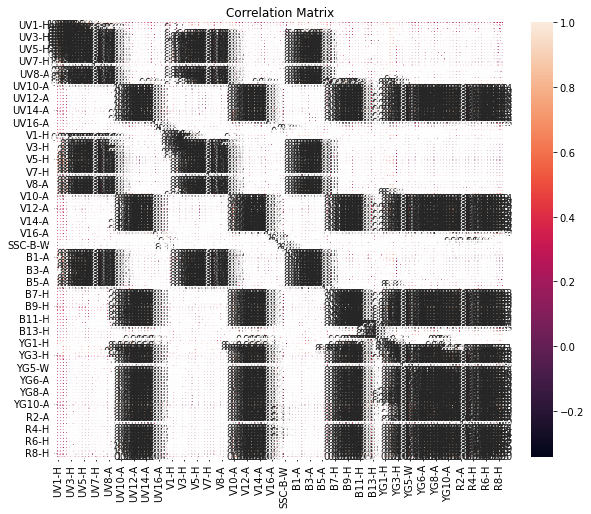

In [20]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [22]:
# Split the DataFrame
time_column = data.iloc[:, 0]  # This is the first column that you don't want to scale
data_to_scale = data.iloc[:, 1:]  # This is the rest of the data that you want to scale

# Apply scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_to_scale)

# Convert scaled data back to DataFrame
scaled_data_df = pd.DataFrame(scaled_data, columns=data.columns[1:], index=data.index)

# Concatenate the unscaled time column with the scaled data
final_data = pd.concat([time_column, scaled_data_df], axis=1)

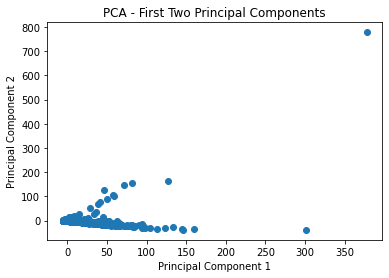

In [24]:
# Perform PCA
pca = PCA(n_components=2)
pca_results = pca.fit_transform(scaled_data)

# Plot the first two principal components
plt.scatter(pca_results[:, 0], pca_results[:, 1])
plt.title('PCA - First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


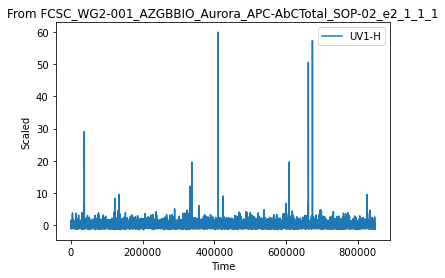

In [28]:
plt.plot(final_data['Time'],final_data['UV1-H'],label='UV1-H')
# Adding labels and title
plt.xlabel('Time')  # Label for the X axis
plt.ylabel('Scaled')  # Label for the Y axis
plt.title('From FCSC_WG2-001_AZGBBIO_Aurora_APC-AbCTotal_SOP-02_e2_1_1_1')    # Title of the plot

# Display the legend
plt.legend()

# Show the plot
plt.show()

In [5]:
meta

{'__header__': {'FCS format': b'FCS3.1',
  'text start': 256,
  'text end': 23995,
  'data start': 25972,
  'data end': 12456675,
  'analysis start': 0,
  'analysis end': 0},
 '$BEGINDATA': '25972       ',
 '$ENDDATA': '12456675    ',
 '$BEGINANALYSIS': '0           ',
 '$ENDANALYSIS': '0           ',
 '$BEGINSTEXT': '0           ',
 '$ENDSTEXT': '0           ',
 '$MODE': 'L',
 '$BYTEORD': '1,2,3,4',
 '$DATATYPE': 'F',
 '$PAR': 143,
 '$TOT': 21732,
 '$NEXTDATA': 0,
 '$TIMESTEP': '0.0001',
 '$DATE': '27-Oct-2022',
 '$BTIM': '20:15:19.74',
 '$ETIM': '20:16:44.50',
 '$OP': 'Admin',
 '$INST': 'Cytekbio',
 '$CYT': 'Aurora',
 '$CYTSN': 'U0552',
 'P1DISPLAY': 'LOG',
 '$P2V': '182',
 'P2DISPLAY': 'LOG',
 '$P3V': '182',
 'P3DISPLAY': 'LOG',
 '$P4V': '107',
 'P4DISPLAY': 'LOG',
 '$P5V': '107',
 'P5DISPLAY': 'LOG',
 '$P6V': '297',
 'P6DISPLAY': 'LOG',
 '$P7V': '297',
 'P7DISPLAY': 'LOG',
 '$P8V': '384',
 'P8DISPLAY': 'LOG',
 '$P9V': '384',
 'P9DISPLAY': 'LOG',
 '$P10V': '307',
 'P10DISPLAY': 'LOG